In [ ]:
import numpy, matplotlib, pybiomart

import scanpy
scanpy.set_figure_params(dpi_save=1000)

# input data

In [2]:
# from http://godsnotwheregodsnot.blogspot.de/2012/09/color-distribution-methodology.html
# from https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
godsnot_102 = [
    # "#000000",  # remove the black, as often, we have black colored annotation
    "#FFFF00",
    "#1CE6FF",
    "#FF34FF",
    "#FF4A46",
    "#008941",
    "#006FA6",
    "#A30059",
    "#FFDBE5",
    "#7A4900",
    "#0000A6",
    "#63FFAC",
    "#B79762",
    "#004D43",
    "#8FB0FF",
    "#997D87",
    "#5A0007",
    "#809693",
    "#6A3A4C",
    "#1B4400",
    "#4FC601",
    "#3B5DFF",
    "#4A3B53",
    "#FF2F80",
    "#61615A",
    "#BA0900",
    "#6B7900",
    "#00C2A0",
    "#FFAA92",
    "#FF90C9",
    "#B903AA",
    "#D16100",
    "#DDEFFF",
    "#000035",
    "#7B4F4B",
    "#A1C299",
    "#300018",
    "#0AA6D8",
    "#013349",
    "#00846F",
    "#372101",
    "#FFB500",
    "#C2FFED",
    "#A079BF",
    "#CC0744",
    "#C0B9B2",
    "#C2FF99",
    "#001E09",
    "#00489C",
    "#6F0062",
    "#0CBD66",
    "#EEC3FF",
    "#456D75",
    "#B77B68",
    "#7A87A1",
    "#788D66",
    "#885578",
    "#FAD09F",
    "#FF8A9A",
    "#D157A0",
    "#BEC459",
    "#456648",
    "#0086ED",
    "#886F4C",
    "#34362D",
    "#B4A8BD",
    "#00A6AA",
    "#452C2C",
    "#636375",
    "#A3C8C9",
    "#FF913F",
    "#938A81",
    "#575329",
    "#00FECF",
    "#B05B6F",
    "#8CD0FF",
    "#3B9700",
    "#04F757",
    "#C8A1A1",
    "#1E6E00",
    "#7900D7",
    "#A77500",
    "#6367A9",
    "#A05837",
    "#6B002C",
    "#772600",
    "#D790FF",
    "#9B9700",
    "#549E79",
    "#FFF69F",
    "#201625",
    "#72418F",
    "#BC23FF",
    "#99ADC0",
    "#3A2465",
    "#922329",
    "#5B4534",
    "#FDE8DC",
    "#404E55",
    "#0089A3",
    "#CB7E98",
    "#A4E804",
    "#324E72",
]
a = godsnot_102[0]; b = godsnot_102[5]
x = godsnot_102
x[0] = 'skyblue'
x[5] = 'gold'
x.append(a); x.append(b)
y = x + x
two_hundred_colors = y[:200]
print(len(two_hundred_colors))

200


In [3]:
iso1 = 'ENST00000354449.7'
iso2 = 'ENST00000354956.9'

In [4]:
%%time
input_file = '/home/adrian/scratch/zscore.tsv'
adata = scanpy.read_csv(input_file, delimiter='\t')
adata

CPU times: user 45.5 s, sys: 592 ms, total: 46.1 s
Wall time: 46.1 s


AnnData object with n_obs × n_vars = 46490 × 4385

# PCA

In [5]:
scanpy.tl.pca(adata, n_comps=100)

# umap and leiden

## all colors

/home/adrian/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1356: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


/home/adrian/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


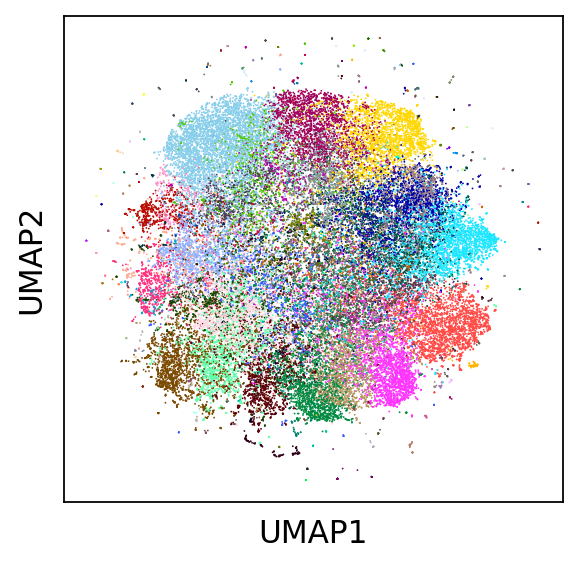

CPU times: user 35.3 s, sys: 1.72 s, total: 37 s
Wall time: 32.3 s


In [6]:
%%time

nei = 5
dist = 0.2
spre = 10

scanpy.pp.neighbors(adata, n_neighbors=nei, n_pcs=100)
scanpy.tl.leiden(adata)
scanpy.tl.paga(adata)
scanpy.pl.paga(adata, plot=False)
scanpy.tl.umap(adata, min_dist=dist, spread=spre, init_pos='paga')         
ax = scanpy.pl.umap(adata, color=['leiden'], palette=two_hundred_colors, legend_loc=None, title='', save='col.png')

## gray

/home/adrian/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


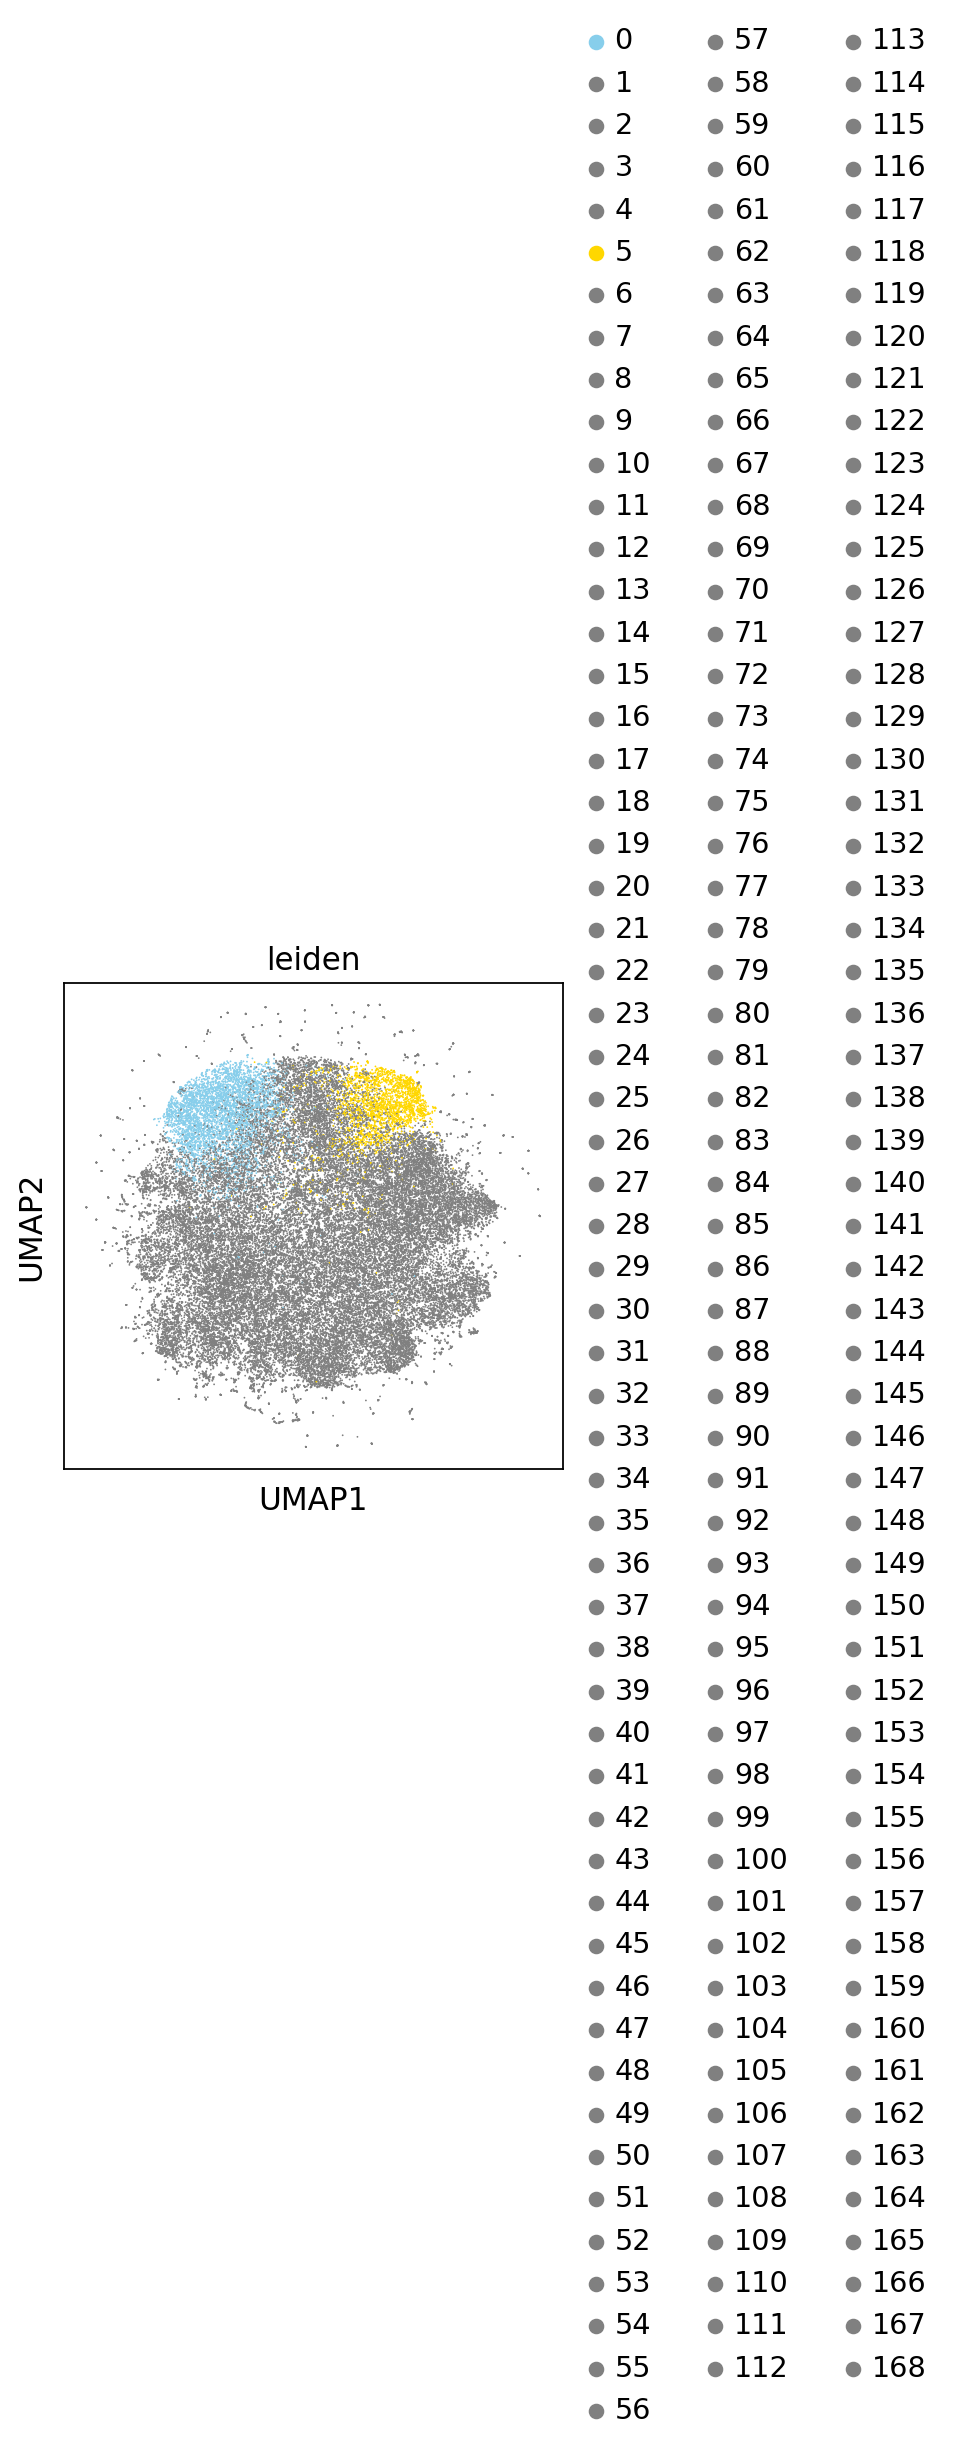

In [7]:
my_colors = []
for category in range(len(adata.obs['leiden'].cat.categories)):
    if str(category) == adata.obs['leiden'][iso1]:
        my_colors.append('gold')
    elif str(category) == adata.obs['leiden'][iso2]:
        my_colors.append('skyblue')
    else:
        my_colors.append('grey')
scanpy.pl.umap(adata, color='leiden', palette=my_colors)

## white

/home/adrian/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


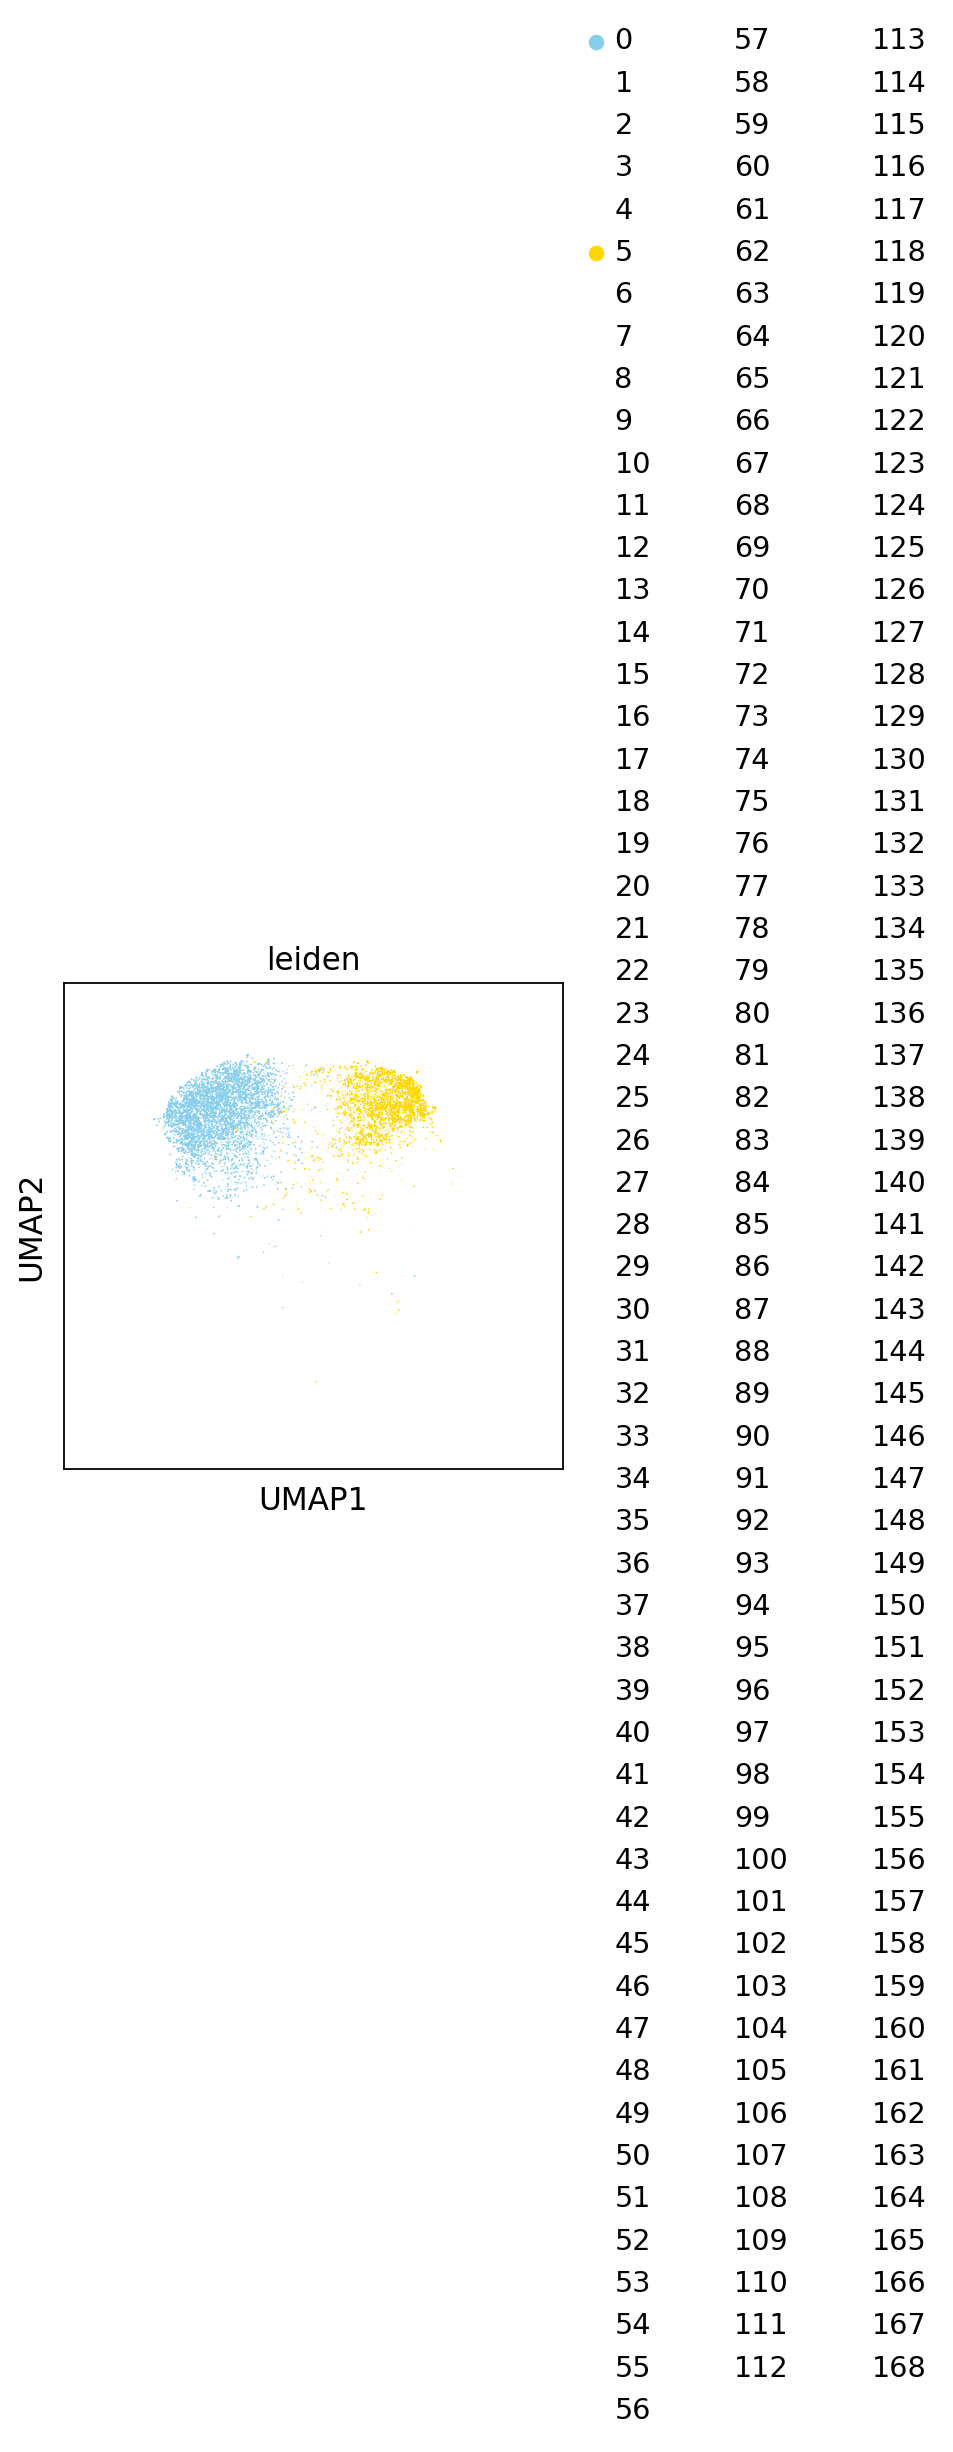

In [8]:
my_colors = []
for category in range(len(adata.obs['leiden'].cat.categories)):
    if str(category) == adata.obs['leiden'][iso1]:
        my_colors.append('gold')
    elif str(category) == adata.obs['leiden'][iso2]:
        my_colors.append('skyblue')
    else:
        my_colors.append('white')
scanpy.pl.umap(adata, color='leiden', palette=my_colors)

## with stars

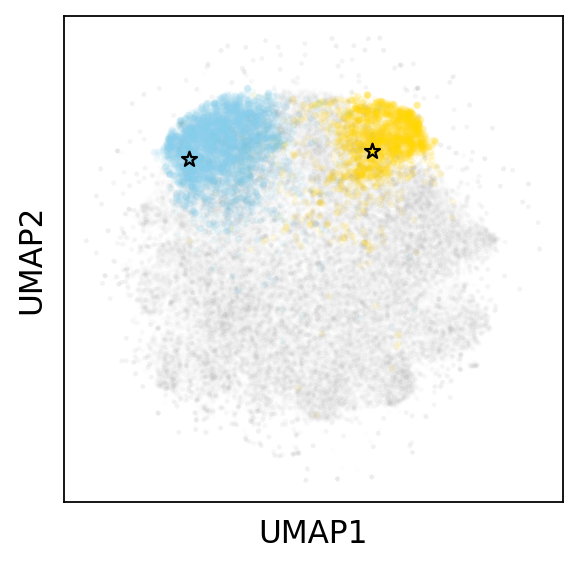

In [13]:
umap0 = adata.obsm['X_umap'][:, 0]
umap1 = adata.obsm['X_umap'][:, 1]

group1x = []; group1y = []
group2x = []; group2y = []
othersx = []; othersy = []

gold_transcripts = []; skyblue_transcripts = []

for i in range(len(adata.obs.index)):

    transcript = adata.obs.index[i]
    label = adata.obs.loc[transcript, 'leiden']
    x = adata.obsm['X_umap'][i, 0] 
    y = adata.obsm['X_umap'][i, 1]

    if label == adata.obs.loc[iso1, 'leiden']:
        group1x.append(x); group1y.append(y)
        gold_transcripts.append(transcript)
    elif label == adata.obs.loc[iso2, 'leiden']:
        group2x.append(x); group2y.append(y)
        skyblue_transcripts.append(transcript)
    else:
        othersx.append(x); othersy.append(y)

matplotlib.pyplot.scatter(group1x, group1y, s=10, c='gold', alpha=0.1, edgecolors='none')
matplotlib.pyplot.scatter(group2x, group2y, s=10, c='skyblue', alpha=0.1, edgecolors='none')
matplotlib.pyplot.scatter(othersx, othersy, s=5, c='gray', alpha=0.01, edgecolors='none')

# location of iso1 and iso2
position1 = adata.obsm['X_umap'][adata.obs.index.get_loc(iso1), :]
position2 = adata.obsm['X_umap'][adata.obs.index.get_loc(iso2), :]
matplotlib.pyplot.scatter(position1[0], position1[1], s=50, c='gold', edgecolors='black', marker='*')
matplotlib.pyplot.scatter(position2[0], position2[1], s=50, c='skyblue', marker='*', edgecolors='black')

matplotlib.pyplot.xlabel('UMAP1')
matplotlib.pyplot.ylabel('UMAP2')
matplotlib.pyplot.xticks([])
matplotlib.pyplot.yticks([])

#matplotlib.pyplot.show()
matplotlib.pyplot.savefig('stars.png', dpi=1000)

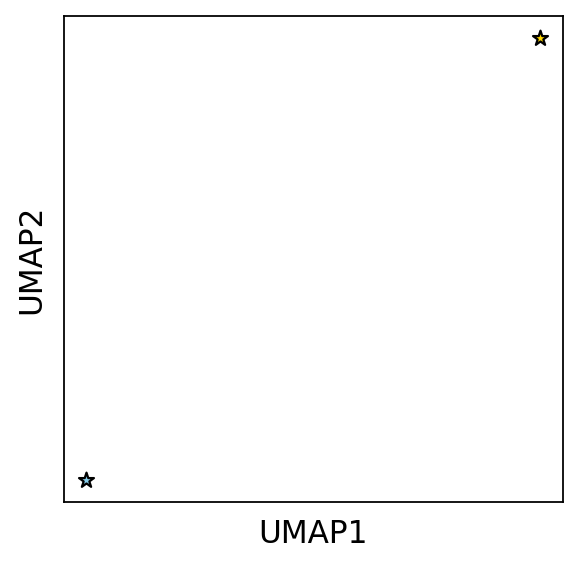

In [10]:
matplotlib.pyplot.scatter(position1[0], position1[1], s=50, c='gold', edgecolors='black', marker='*')
matplotlib.pyplot.scatter(position2[0], position2[1], s=50, c='skyblue', marker='*', edgecolors='black')

matplotlib.pyplot.xlabel('UMAP1')
matplotlib.pyplot.ylabel('UMAP2')
matplotlib.pyplot.xticks([])
matplotlib.pyplot.yticks([])

matplotlib.pyplot.savefig('starsonly.svg')

# work with co-expressed transcripts 

In [17]:
print(len(gold_transcripts), len(skyblue_transcripts))

print(iso1 in gold_transcripts, iso2 in gold_transcripts)
print(iso2 in skyblue_transcripts, iso1 in skyblue_transcripts)

2346 4252
True False
True False


## convert transcripts into genes

In [27]:
short_gold_transcripts = [transcript.split('.')[0] for transcript in gold_transcripts]
short_skyblue_transcripts = [transcript.split('.')[0] for transcript in skyblue_transcripts]

['ENST00000449352', 'ENST00000438911', 'ENST00000324472', 'ENST00000505194', 'ENST00000585673', 'ENST00000497514', 'ENST00000524852', 'ENST00000424469', 'ENST00000395476', 'ENST00000446558']


In [19]:
dataset = pybiomart.Dataset(name='hsapiens_gene_ensembl', host='http://www.ensembl.org')
annotation = dataset.query(attributes=['ensembl_gene_id', 'ensembl_transcript_id', 'entrezgene_id', 'gene_biotype', 'external_gene_name', 'description'])
annotation.fillna(value={'NCBI gene (formerly Entrezgene) ID':-1}, inplace=True)
annotation = annotation.astype({'NCBI gene (formerly Entrezgene) ID':'int'})
annotation.set_index('Gene stable ID', inplace=True)
annotation

,Transcript stable ID,NCBI gene (formerly Entrezgene) ID,Gene type,Gene name,Gene description
Gene stable ID,,,,,
ENSG00000210049,ENST00000387314,-1,Mt_tRNA,MT-TF,mitochondrially encoded tRNA-Phe (UUU/C) [Sour...
ENSG00000211459,ENST00000389680,-1,Mt_rRNA,MT-RNR1,mitochondrially encoded 12S rRNA [Source:HGNC ...
ENSG00000210077,ENST00000387342,-1,Mt_tRNA,MT-TV,mitochondrially encoded tRNA-Val (GUN) [Source...
ENSG00000210082,ENST00000387347,-1,Mt_rRNA,MT-RNR2,mitochondrially encoded 16S rRNA [Source:HGNC ...
ENSG00000209082,ENST00000386347,-1,Mt_tRNA,MT-TL1,mitochondrially encoded tRNA-Leu (UUA/G) 1 [So...
...,...,...,...,...,...
ENSG00000198216,ENST00000700189,777,protein_coding,CACNA1E,calcium voltage-gated channel subunit alpha1 E...
ENSG00000198216,ENST00000644521,777,protein_coding,CACNA1E,calcium voltage-gated channel subunit alpha1 E...
ENSG00000198216,ENST00000700190,777,protein_coding,CACNA1E,calcium voltage-gated channel subunit alpha1 E...


In [29]:
found_indices = []
for index, row in annotation.iterrows():
    if row['Transcript stable ID'] in short_gold_transcripts:
        found_indices.append(index)

print(len(found_indices))

2323


In [32]:
found_indices[:10]

['ENSG00000275428',
 'ENSG00000276017',
 'ENSG00000274706',
 'ENSG00000273831',
 'ENSG00000274679',
 'ENSG00000261893',
 'ENSG00000274137',
 'ENSG00000274137',
 'ENSG00000277429',
 'ENSG00000277429']

In [33]:
annotation.loc[found_indices, :].to_csv('test.csv')